# Notebook to look into the Forbes list of billionaires to see what it tells us

In [65]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [66]:
# read in the data
df = pd.read_csv('forbes_2022.csv', index_col=[0])

In [67]:
# create new columns too show if these are individuals or if the source comes from multiple avenues and group ages
df['multi_people'] = df['name'].str.contains('&') | df['name'].str.contains(' and ')
df['multi_source'] = df['source'].str.contains(',')
df['age_bins'] = pd.cut(df.age,bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df.head()

,rank,name,networth,age,country,source,industry,multi_people,multi_source,age_bins
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,False,True,"(40, 50]"
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,False,False,"(50, 60]"
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,True,False,"(70, 80]"
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,False,False,"(60, 70]"
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,False,False,"(90, 100]"


# Which industry has the most billionaires?

Text(0.5, 1.0, 'Billionaires by industry')

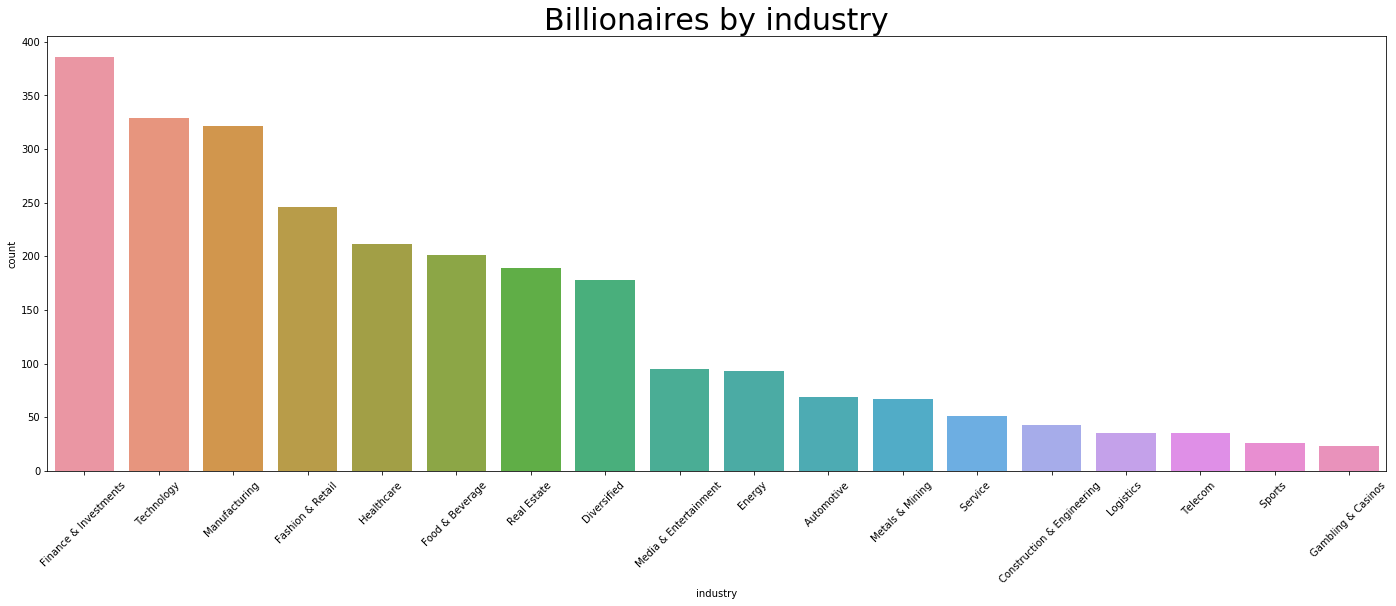

In [68]:
plt.figure(figsize=(24,8))
sns.countplot(x ='industry', data = df, order = df['industry'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Billionaires by industry",fontsize=30)

In [69]:
max_ind = df['industry'].value_counts().idxmax()
max_num = df['industry'].value_counts().max()
print(f'The industry with the most billionaires is {max_ind}with {max_num} billionaires in this area.')

The industry with the most billionaires is Finance & Investments with 386 billionaires in this area.


# What is the age split of billionaires?

Text(0.5, 1.0, 'Billionaires by age group')

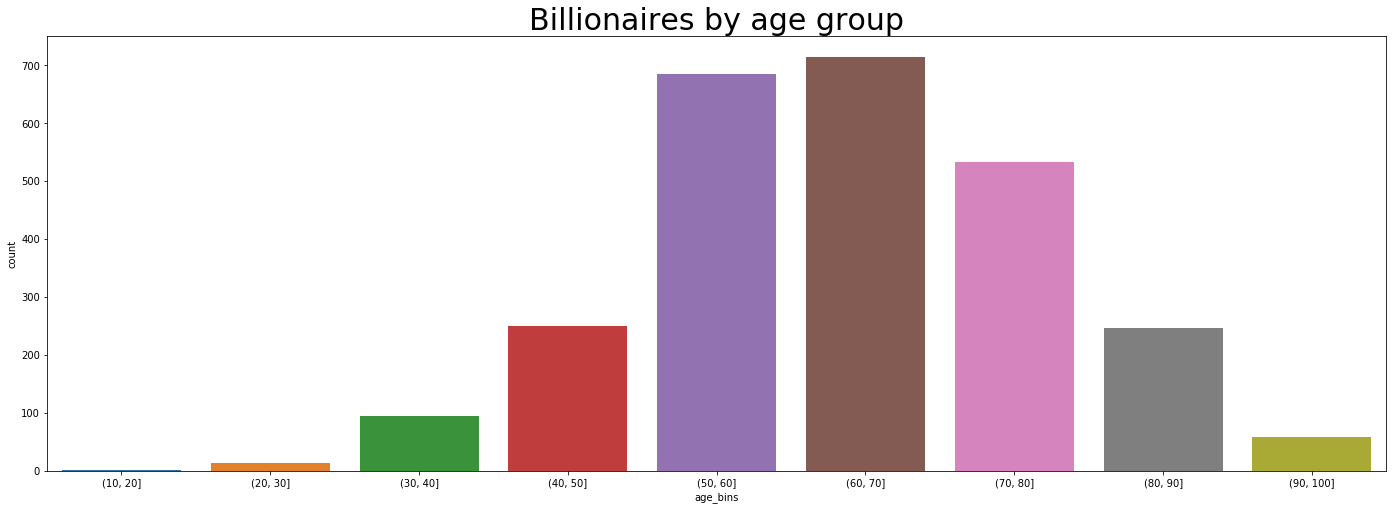

In [70]:
plt.figure(figsize=(24,8))
sns.countplot(x ='age_bins', data = df)
plt.title("Billionaires by age group",fontsize=30)

In [71]:
max_age = df['age'].max()
min_age = df['age'].min()
age_range = df['age_bins'].value_counts().idxmax()
print(f'The youngest billionare is {min_age} years old and the oldest is {max_age} years old.')      
print(f'Most billionaires are in the range {age_range.left} to {age_range.right} years old.')

The youngest billionare is 19 years old and the oldest is 100 years old.
Most billionaires are in the range 60 to 70 years old.


# Where are the billioniares?

In [72]:
# create new columns to count where the billionaires are
country_count = df['country'].value_counts().rename_axis('country').reset_index(name='counts')
country_count['area'] = np.where(country_count['counts']<20, 'Rest of world', country_count['country'])
country_count['counts'] = np.where(country_count['area']=='Rest of world',
                country_count.area.map(lambda desc: 'Rest of world' in desc).sum(), country_count['counts'])
df = df.merge(country_count).sort_values(by=['counts'], ascending=False)

Text(0.5, 1.0, 'Billionaires by country')

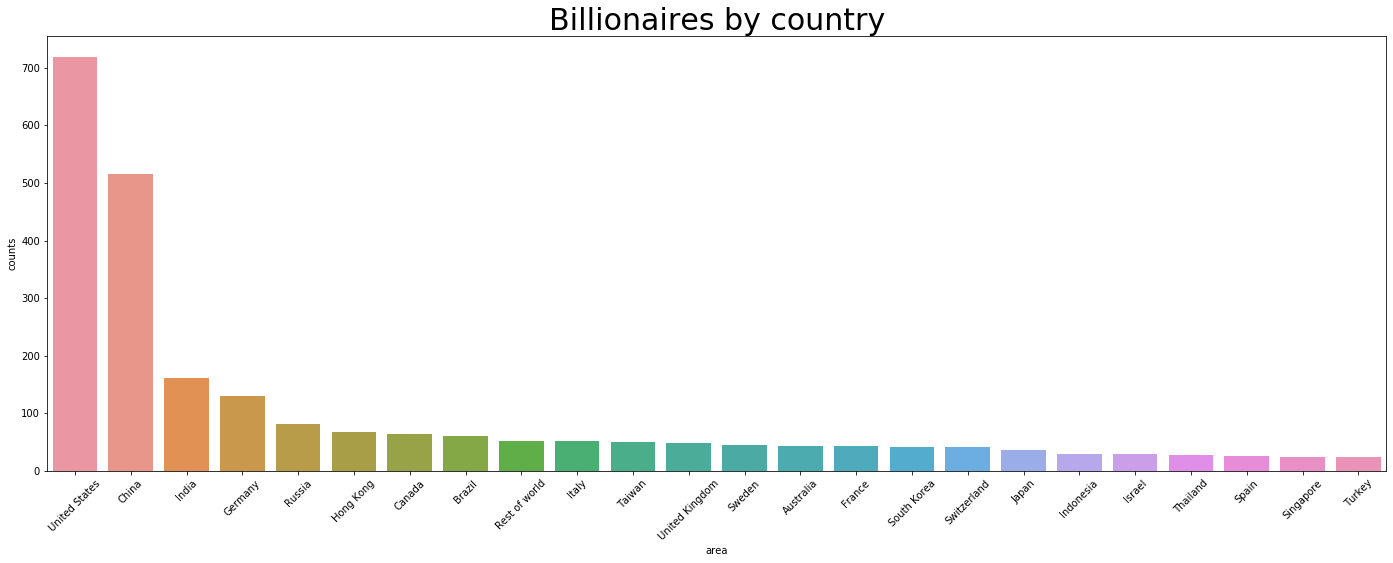

In [73]:
plt.figure(figsize=(24,8))
sns.barplot(x=df['area'], y=df['counts'])
plt.xticks(rotation=45)
plt.title("Billionaires by country",fontsize=30)

In [74]:
co_max = df['country'].value_counts(normalize=True).idxmax()
co_max_perc = ((df['country'].value_counts(normalize=True).max())*100).round(1)
print(f'{co_max_perc}% of billionaires are from {co_max}.')

27.7% of billionaires are from United States.


# Are most billionaires groups of individuals?

Text(0.5, 1.0, 'Billionaires are groups of individuals')

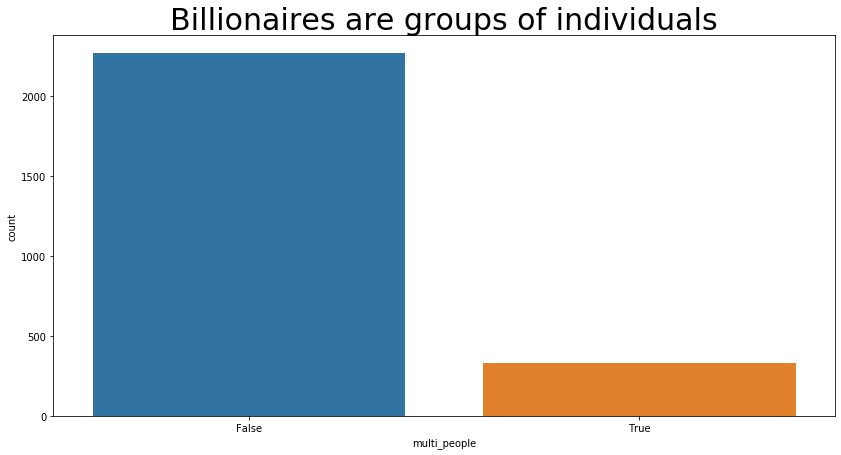

In [75]:
plt.figure(figsize=(14,7))
sns.countplot(x='multi_people', data=df)
plt.title("Billionaires are groups of individuals",fontsize=30)

In [76]:
indiv = df['multi_people'].value_counts().idxmax()
ind_count = df['multi_people'].value_counts()[False]
print(f'It is {indiv} that most billionaires are groups of individuals. {ind_count} are individuals.')

It is False that most billionaires are groups of individuals. 2267 are individuals.


# Do most billionaires have multiple source?

Text(0.5, 1.0, 'Billionaires have multiple sources')

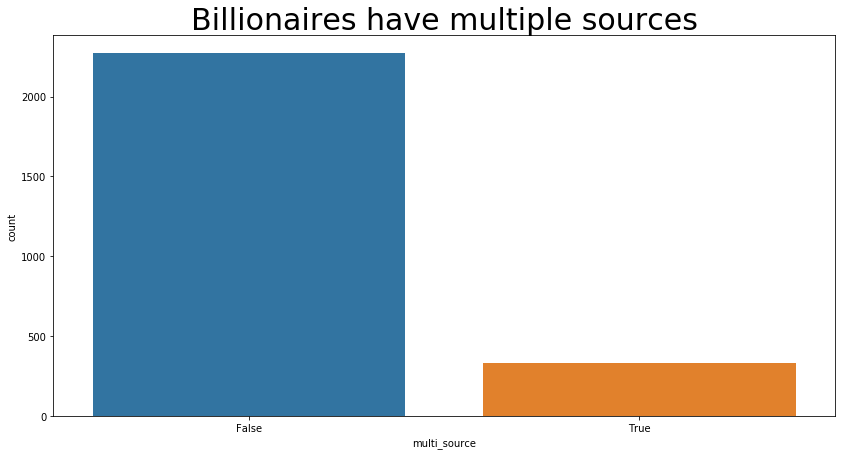

In [77]:
plt.figure(figsize=(14, 7))
sns.countplot(x='multi_source', data=df)
plt.title("Billionaires have multiple sources",fontsize=30)

In [78]:
multi = df['multi_source'].value_counts().idxmax()
print(f'It is {multi} that most billionares have multiple sources.')

It is False that most billionares have multiple sources.


# Billionaires outside the US and China by age and country

In [79]:
#create a new dataframe to be able to generate heatmap
age_co_df = df[['area','age_bins']].copy()

#exclude USA and China as covers nearly 50% of all billionaires
indexes = age_co_df[(age_co_df['area'] == 'United States') | (age_co_df['area'] == 'China')].index
#drop US and China rows
age_co_df.drop(indexes,inplace=True)

age_co_df = age_co_df.groupby('area')['age_bins'].value_counts()
age_co_df = age_co_df.unstack(level=-1)

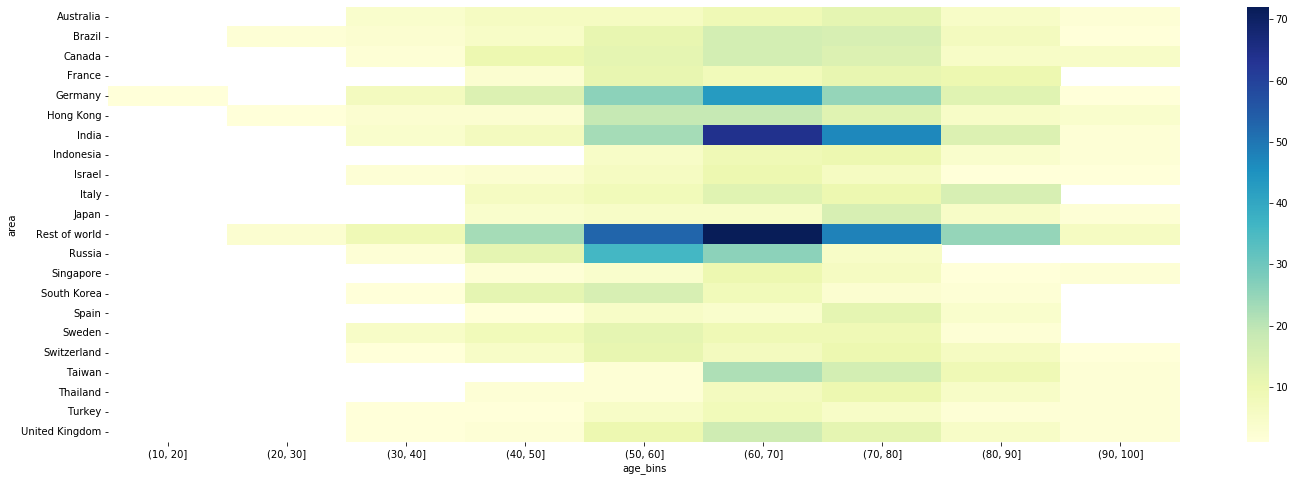

In [80]:
plt.figure(figsize=(24,8))
sns.heatmap(data=age_co_df, cmap="YlGnBu")

The graph shows most countries have a similar spread (30-90).  Japan and Spain show a higher rate of older billionaires, while Russia and South Korea show the majority of billionaires in a younger age range.

The majority of countries have billionaires aged over 90 - while only Germany has a billionaire under 20.

Brazil and Hong Kong have billionaries covering 20-100.

# Billionaires across the US and China by age

In [81]:
#create a new dataframe to be able to generate heatmap
usc_age_co_df = df[['area','age_bins']].copy()

#include only USA and China 
indexes = usc_age_co_df[(usc_age_co_df['area'] != 'United States') & (usc_age_co_df['area'] != 'China')].index
#drop non-US and non-China rows
usc_age_co_df.drop(indexes,inplace=True)

usc_age_co_df = usc_age_co_df.groupby('area')['age_bins'].value_counts()
usc_age_co_df = usc_age_co_df.unstack(level=-1)

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

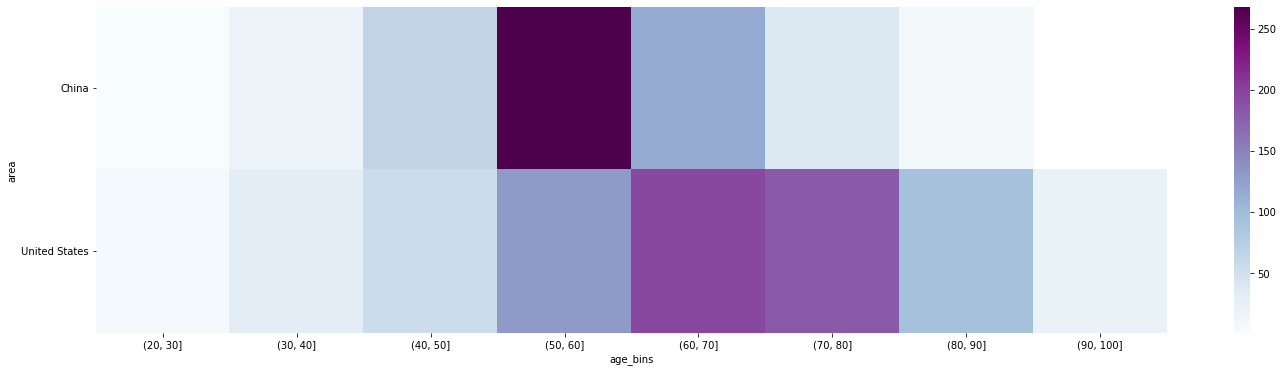

In [82]:
plt.figure(figsize=(24,6))
sns.heatmap(data=usc_age_co_df, cmap="BuPu")
plt.yticks(rotation=0)

This graph shows that while the US has the most billionaires in the spilt 50-90, China covers 40-70 so a younger set of billionaires in China.

Both have a wide age span - with the USA covering every age span from 20-100.

# Billionaires by age and industry

In [83]:
#create a new dataframe to be able to generate heatmap
age_ind_df = df[['industry','age_bins']].copy()

age_ind_df = age_ind_df.groupby('industry')['age_bins'].value_counts()
age_ind_df = age_ind_df.unstack(level=-1)

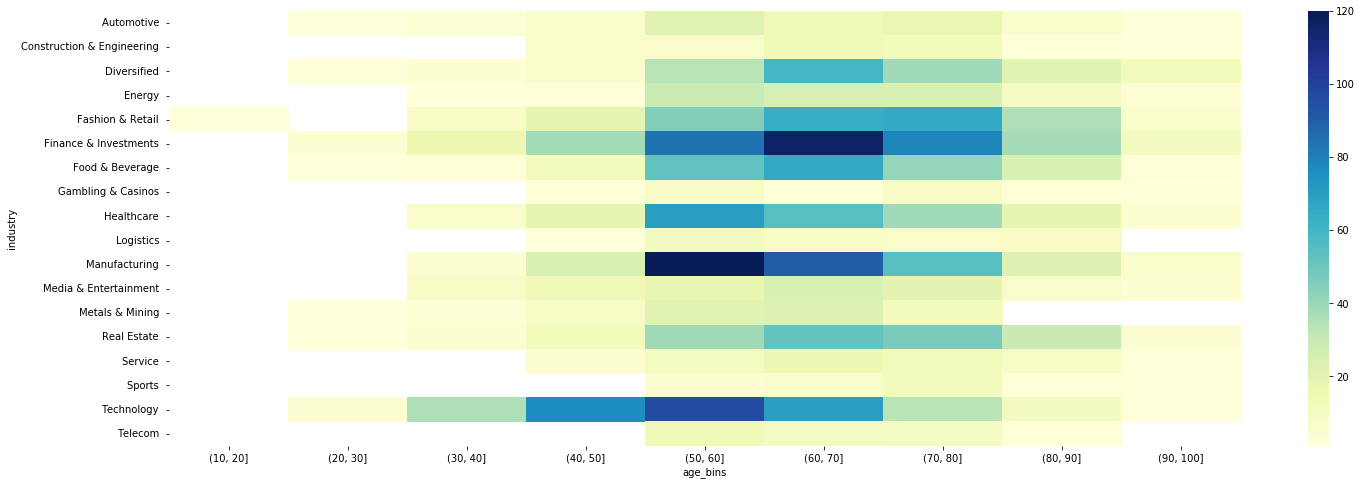

In [84]:
plt.figure(figsize=(24,8))
sns.heatmap(data=age_ind_df, cmap="YlGnBu")

The graph shows that younger billionaires (20-40) are predominantly in the Technology or Finance & Investment sectors, while the older billionaires (79-90) cover a wider range of sectors.

Metals & Mining don't have any billionaires over 80 while Sports and Telecom don't have any under 50.

Telecom has the shortest age span, but most other industries have billionares across a wide age span.

# Billionaires by industry and country excluding US and China

In [85]:
#create a new dataframe to be able to generate heatmap
co_ind_df = df[['area','industry']].copy()

#exclude USA and China as covers nearly 50% of all billionaires
indexes = co_ind_df[(co_ind_df['area'] == 'United States') | (co_ind_df['area'] == 'China')].index
#drop US and China rows
co_ind_df.drop(indexes,inplace=True)

co_ind_df = co_ind_df.groupby('area')['industry'].value_counts()
co_ind_df = co_ind_df.unstack(level=-1)

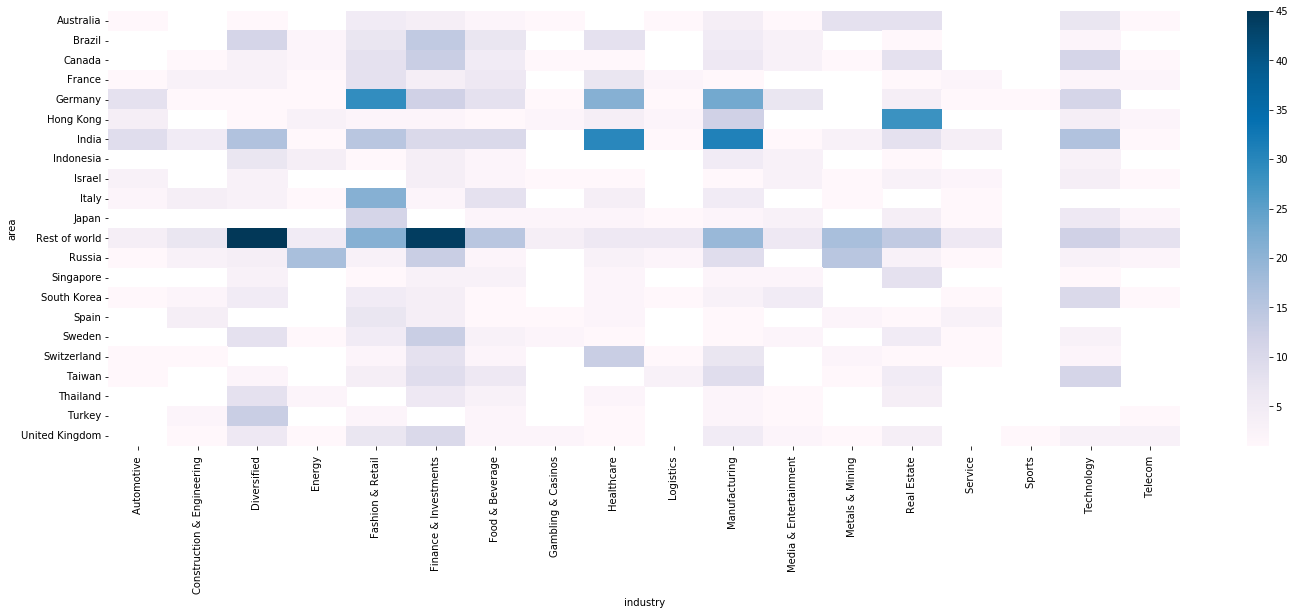

In [86]:
plt.figure(figsize=(24,8))
sns.heatmap(data=co_ind_df, cmap="PuBu")

This graph shows Food & Beverage and Manufacturing billionaires in all areas, but Sport billionaires only appear in the UK or Germany.

Finance, Fashion, Healthcare, Real Estate and Technology also have good coverage around the world but Metals & Mining and Logistics are not so spread out.

Most countries have billionaires across a wide range of industries - only Turkey and Thailand have billionaires in less than half of all industries.

Germany and India only have 2 industries where they don't have billionaires.

# Billionaires across US and China by industry

In [87]:
#create a new dataframe to be able to generate heatmap
usc_co_ind_df = df[['area','industry']].copy()

#include only USA and China 
indexes = usc_co_ind_df[(usc_co_ind_df['area'] != 'United States') & (usc_co_ind_df['area'] != 'China')].index
#drop non-US and non-China rows
usc_co_ind_df.drop(indexes,inplace=True)

usc_co_ind_df = usc_co_ind_df.groupby('area')['industry'].value_counts()
usc_co_ind_df = usc_co_ind_df.unstack(level=-1)

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

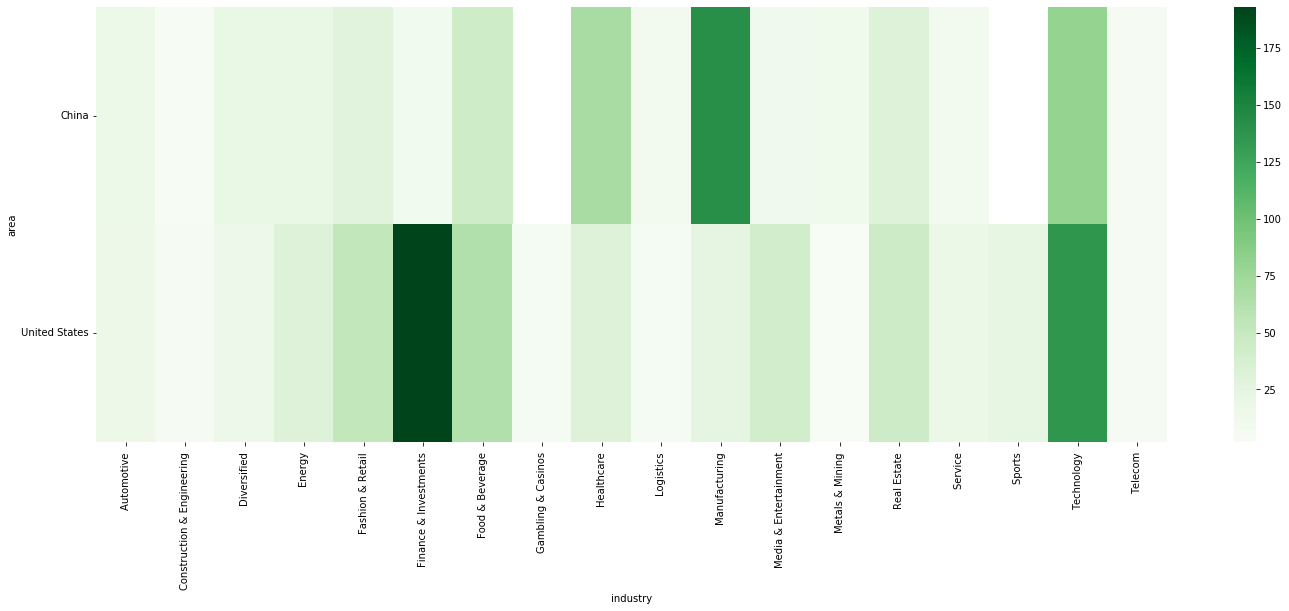

In [88]:
plt.figure(figsize=(24,8))
sns.heatmap(data=usc_co_ind_df, cmap="Greens")
plt.yticks(rotation=0)

This graph shows that although both countries cover a wide range of industries, the majority of billionaires are in different industries - US in Finance and China in Manufacturing.